In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline 

In [2]:
import sympy as sm

In [3]:
s0, w0, d = sm.symbols('s0 w0 d', positive=True, real=True)
ti, tj, dt, t, tp = sm.symbols('ti, tj, dt, t, tp', real=True)
tau = sm.symbols('tau', real=True, positive=True)
efp = sm.exp(-w0 * (t - tp) / sm.sqrt(2))
efm = sm.exp(-w0 * (tp - t) / sm.sqrt(2))
kernp = s0 * w0 * efp * sm.cos(w0 * (t-tp) / sm.sqrt(2) - sm.pi / 4)
kernm = s0 * w0 * efm * sm.cos(w0 * (tp-t) / sm.sqrt(2) - sm.pi / 4)

In [4]:
k1 = sm.simplify(
    sm.integrate(
        sm.integrate(kernp, (tp, tj - d / 2, tj + d / 2)), (t, tj + d / 2, ti + d / 2)
    )
    / d ** 2
)
k2 = sm.simplify(
    sm.integrate(sm.integrate(kernp, (tp, tj - d / 2, t)), (t, ti - d / 2, tj + d / 2))
    / d ** 2
)
k3 = sm.simplify(
    sm.integrate(sm.integrate(kernm, (tp, t, tj + d / 2)), (t, ti - d / 2, tj + d / 2))
    / d ** 2
)

In [5]:
kD = sm.simplify((k1 + k2 + k3).expand())
res = sm.simplify(kD.subs([(ti, tau + tj)]))
res

2*s0/d - 2*s0*tau/d**2 + s0*exp(-sqrt(2)*d*w0/2 - sqrt(2)*tau*w0/2)*cos(sqrt(2)*d*w0/2 + sqrt(2)*tau*w0/2 + pi/4)/(d**2*w0) + s0*exp(-sqrt(2)*d*w0/2 + sqrt(2)*tau*w0/2)*cos(sqrt(2)*d*w0/2 - sqrt(2)*tau*w0/2 + pi/4)/(d**2*w0) - 2*s0*exp(-sqrt(2)*tau*w0/2)*cos(sqrt(2)*tau*w0/2 + pi/4)/(d**2*w0)

In [6]:
resd = sm.simplify(res.subs([(tau, d)]))
resd

sqrt(2)*s0/(2*d**2*w0) + s0*exp(-sqrt(2)*d*w0)*cos(sqrt(2)*d*w0 + pi/4)/(d**2*w0) - 2*s0*exp(-sqrt(2)*d*w0/2)*cos(sqrt(2)*d*w0/2 + pi/4)/(d**2*w0)

In [7]:
def var(w0, d):
    e1 = np.sqrt(2) * d * w0
    f1 = 1 / (d * d * w0 * np.sqrt(2))
    f2 = 1 * np.exp(-e1) * np.cos(e1 + np.pi / 4) / (d * d * w0)
    f3 = 2  * np.exp(-e1) *np.cos(e1/2 + np.pi / 4) / (d * d * w0)
    return f1 + f2 - f3  

def mvar(s0, w0, d, alpha, sigma):
    alpha = s0 * alpha[:, None] * np.sqrt(var(w0, d))
    sum = np.sum(alpha, axis=0)
    sum2 = np.sum(alpha**2, axis=0)
    num = sigma * sigma + sum2
    denom = len(alpha) * (1 + sum2 / (sigma * sigma)) - (sum / sigma) ** 2
    return num / denom

def var1(s0, w0, d, alpha, sigma):
    alpha = s0 * alpha[:, None] * np.sqrt(var(w0, d))
    sum = np.sum(alpha, axis=0)
    return sigma * sigma / len(alpha) + (sum / len(alpha))**2

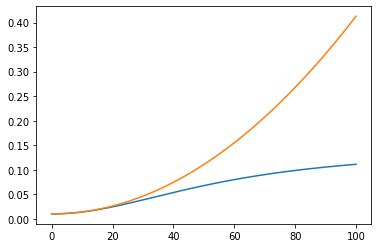

In [8]:
s0 = np.linspace(0, 100, 1000)
w0 = 0.001
alpha = np.linspace(1, 2, 3)
sigma = 0.1 * np.sqrt(3)
d = 2 * np.pi / w0
pl.plot(s0, mvar(s0, w0, d, alpha, sigma))
pl.plot(s0, var1(s0, w0, d, alpha, sigma))